## Hospital-Stay-Prediction

Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a machine learning model to predict the length of stay (in days) of a patient entering the hospital, given various factors about their stay.


In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode

#### Load the Dataset

In [2]:
patient_data = pd.read_csv("HealthCareAnalytics.csv")
patient_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


### Exploratory Data Analysis (EDA) / Basic Checks

In [3]:
# View the first five rows of the dataset
patient_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [4]:
# View the last five rows of the dataset
patient_data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,Nov-20,4752,0-10


In [5]:
# View the shape of the dataset
patient_data.shape

(318438, 18)

In [6]:
# View the statistical information of the numerical columns (features)
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available_Extra_Rooms_in_Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed_Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors_with_Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


In [7]:
# View datatypes of the features in the dataset
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### Data Preprocessing

In [8]:
# Check for null values
patient_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

The Bed_Grade column has 113 null values and City_Code_Patient has 4,532 null values. Let's handle these null values first.

### Handle Null Values (Bed Grade)

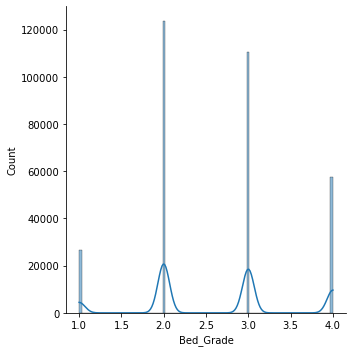

In [9]:
# Check the distribution of the Bed Grade feature
sns.displot(patient_data.Bed_Grade, kde=True)

In [10]:
# Display the 113 records that are missing a value for Bed Grade
patient_data.loc[patient_data['Bed_Grade'].isnull()==True]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,Nov-20,2416,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984,Nov-20
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139,51-60


In [11]:
# Use Mode to fill in the missing values for Bed Grade
patient_data.loc[patient_data['Bed_Grade'].isnull()==True,'Bed_Grade'] = patient_data['Bed_Grade'].mode()[0]

Using Mode to replace the missing values in Bed Gade seems reasonable since this value is most likely determined by subjective observation. Taking the Mode (most repeating value) is a good representation of the beds that do not have a value since the most repeating value is probably the state of most beds at the institution.

In [12]:
# Check again for missing a values for Bed Grade; they are now gone.
patient_data.loc[patient_data['Bed_Grade'].isnull()==True]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


### Handle Null Values (City Code Patient)

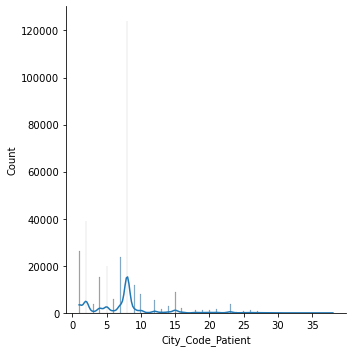

In [13]:
# Check Distribution of the feature
sns.displot(patient_data.City_Code_Patient, kde=True)

When the distribution is skewed we use the median to handle the missing values.

In [14]:
patient_data.loc[patient_data['City_Code_Patient'].isnull()==True, 'City_Code_Patient'] = np.median(patient_data['City_Code_Patient'].dropna(axis=0))

In [15]:
# Check again for missing a values for City Code Patient; they are now gone
patient_data.loc[patient_data['City_Code_Patient'].isnull()==True]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


In [16]:
# Check the entire dataset (again) for null values
patient_data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

#### We have successfully dealt with the missing/null values in our dataset and can proceed.

#### Drop Unnecessary Column

In [17]:
# Drop the case_id column as it doesn't seem useful for the business case.
patient_data.drop('case_id', axis=1, inplace=True)

In [18]:
patient_data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


<AxesSubplot:>

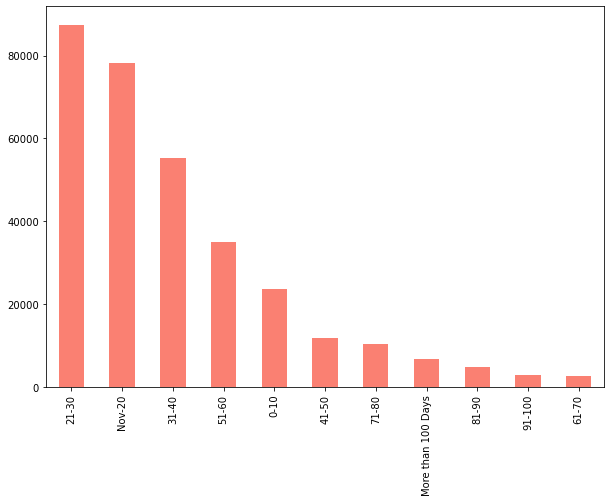

In [19]:
# Distribution of target feature

plt.figure(figsize=(10,7))
patient_data.Stay.value_counts().plot(kind="bar", color = ['Salmon'])

Insight: Most of the patients stay in hospital for 21-30 days, followed by 11-20, 31-40

In [20]:
patient_data.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

We have to deal with the Age category that reads 'Nov-20'. Nov-20 is not a valid age range. We will replace the 'Nov-20' records with 11-20 since this was probably a data-entry error as November is the 11th month. Instead of 11-20, the user probably entered Nov-20.

In [21]:
patient_data = patient_data.replace('Nov-20','11-20')

In [22]:
patient_data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,11-20
318434,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,11-20
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761,11-20


In [23]:
# Check for unique values in every column
for features in patient_data.columns:
    print('Unique Values for {}'.format(features))
    print(patient_data[features].unique())
    print('======================================')
    print()

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]

Unique Values for Hospital_region_code
['Z' 'X' 'Y']

Unique Values for Available_Extra_Rooms_in_Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']

Unique Values for Bed_Grade
[2. 3. 4. 1.]

Unique Values for patientid
[ 31397  63418   8088 ... 125235  91081  21641]

Unique Values for City_Code_Patient
[ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35. 36.
 38.]

Unique Values for Type_of_Admiss

### Dealing With Categorical Data

In [24]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in patient_data.columns:
    patient_data[column] = labelencoder.fit_transform(patient_data[column])

In [25]:
patient_data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,1,21972,6,0,0,2,5,2954,0
1,1,2,4,2,2,3,3,5,1,21972,6,1,0,2,5,3997,4
2,9,4,0,0,2,1,3,4,1,21972,6,1,0,2,5,2788,3
3,25,1,1,1,2,3,2,3,1,21972,6,1,0,2,5,5315,4
4,25,1,1,1,2,3,3,3,1,21972,6,1,0,2,5,3601,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,0,3,3,1,5,3,60619,21,0,2,3,4,2187,1
318434,23,0,0,0,2,1,1,4,3,211,7,2,2,4,8,4742,3
318435,6,0,3,0,3,2,2,5,3,87605,9,0,1,3,7,2278,1
318436,10,1,1,1,3,1,1,3,2,63826,7,1,1,5,1,1804,1


#### Deal with NaN value for the 'More than 100 Days' --> 10 Mapping

In [26]:
# Replace the NaN value in the target column Stay with 10 (represents 'More than 100 days' in our project)
patient_data['Stay']=patient_data['Stay'].fillna(10)

In [27]:
# (Re)check the unique values of our target column to confirm that the NaN value has been replaced
patient_data['Stay'].unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9])

### Deal with Categorical Data (Ward Facility Code)

Research determined the values for Ward Facility Code correspond to an actual medical/hospital standard.

There is an ABCDEF bundle used in health care. We will convert this to a numerical value since this medical featue probably affects LOS.

See references below:

https://nyschp.memberclicks.net/assets/docs/EventsEducation/Sleep%20no%20more%20ABCDEF%20Ashulter.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5351776/#:~:text=the%20ABCDEF%20bundle.-,The%20ABCDEF%20bundle%20includes%3A%20Assess%2C%20Prevent%2C%20and%20Manage%20Pain,engagement%20and%20empowerment%20(F)

https://journals.lww.com/ccejournal/fulltext/2021/03000/abcdef_bundle_and_supportive_icu_practices_for.12.aspx

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8286762/ (COVID specific)

#### Analysis of Ward Type and Ward Facility Code Features

The values in Ward Type and Ward Facility Code correspond to medical care acronyms and that could be the case in our dataset.

Ward Type has unique values of PQRST which correspond to PQRSTU assessment method.

Ward Facility Code has unique values of ABCDEF which correspond to the ABCDEF medical bundle.

Even if we do not have the domain knowledge or access to a domain knowledge expert, we can reasonably assume/conclude that these two features will affect the target variable (Stay) in our dataset.

### Data Science in Health Care

The authors of the recently released *Data Science in Context* make the point that data science is transdisciplinary and needs to builds coalitions, “Data science operates in a societal context. Making sure we “get it right” requires partnerships which must include viewpoints from non-STEM (science, technology, engineering, and mathematics) domains such as sociology, law, economics, philosophy, and political policy.”

This point is important because doing/getting data science right cannot be reduced to getting high model accuracy scores. The authors agree that data science can help solve problems in healthcare, but also “illustrate the complexity of gaining meaningful results. Whether due to data quality, privacy, complex models, or the difficulties in determining causality, using healthcare records at scale is difficult.”

They continue, “To support data gathering and use, there must be complex data management software that aggregates data while both preserving privacy and allowing for the transparency needed in scientific studies. When data is gathered from multiple sites, due attention must be paid to the risks of fraud. Sites are likely to anonymize or aggregate data prior to release, making validation more difficult.”

“The near-universal collection of healthcare records can suggest new hypotheses, support post-approval monitoring of new drugs, provide an interactive analysis platform for researchers to explore new ideas, catalyze new approaches for screening or preventing disease, and sometimes answer critical healthcare questions. However, frequently, issues of data quality and availability, modeling complexity, privacy and security, the difficulty in determining causal relationships, and more make these applications difficult.”

We must keep the above in mind as we apply suitable ML algorithms and record their results/scores for our business problem.

Shayan Mohanty, a guest on *Super Data Science Podcast Episode (635)*, <a href="url" target="https://www.superdatascience.com/podcast/the-perils-of-hand-labeling-data-for-machine-learning-models">The Perils of Manually Labeling Data for Machine Learning Models</a>, made relevant points about the ethical and other concerns about using hand labeled data in supervised machine learning. While a full discussion of this topic might be out of scope here, it should be noted and a link to the show which includes the show's transcript is provided for reference.


## Feature & Model Selection

It is labelled data so we have to choose from supervised ML algorithms: Linear Regression, Decision Trees for example.

Writing for *The JetBrains Datalore Blog*, Jodie Burchell, <a href="url" target="https://blog.jetbrains.com/datalore/2022/11/08/how-to-prepare-your-dataset-for-machine-learning-and-analysis/">How to Prepare Your Dataset for Machine Learning and Analysis</a>, says "Most datasets for machine learning projects or analyses are not purpose-built, meaning that occasionally we have to guess how the fields were collected or what they actually measure. In the absence of a data dictionary, or someone to explain what the dataset’s fields mean, we may need to work this out based on the information we have."

We have to work out as best we can in the absence of (1) a domain expert like a doctor, or (2) someone who was directly involved in collecting/creating the dataset, what the features of the dataset mean. It is unlikely that this dataset was purpose-built to answer/solve our business problem, therefore not all of the features will necessarily apply to our business problem.

One way to determine what our features are measuring is to check their relationships with other features. If two or more fields/features are highly correlated we can assume that they are measuring similar things.

We also have to check for feature leakage, that is, if any of our features are too highly related to the target (Stay in this case). That doesn't seem to be the case here.

### Create Final Dataset with Features to be used in Models

We think the following features can be dropped from this dataset as they do not seem to contribute to our business problem/project and would not affect LOS: Hospital Code, Hospital Type Code, City Code Hospital, Hospital Region Code, Patient ID, City Code Patient

In [28]:
patient_data_final=patient_data.drop(labels=['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'patientid', 'City_Code_Patient'], axis=1)
patient_data_final

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,3,3,2,5,1,0,0,2,5,2954,0
1,2,3,3,5,1,1,0,2,5,3997,4
2,2,1,3,4,1,1,0,2,5,2788,3
3,2,3,2,3,1,1,0,2,5,5315,4
4,2,3,3,3,1,1,0,2,5,3601,4
...,...,...,...,...,...,...,...,...,...,...,...
318433,3,3,1,5,3,0,2,3,4,2187,1
318434,2,1,1,4,3,2,2,4,8,4742,3
318435,3,2,2,5,3,0,1,3,7,2278,1
318436,3,1,1,3,2,1,1,5,1,1804,1


In [29]:
# View datatype information about the dataset (after dealing with categorical data and dropping columns that do not appear to be related to the business problem.
# We now have 11 numerical columns
patient_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Available_Extra_Rooms_in_Hospital  318438 non-null  int64
 1   Department                         318438 non-null  int32
 2   Ward_Type                          318438 non-null  int32
 3   Ward_Facility_Code                 318438 non-null  int32
 4   Bed_Grade                          318438 non-null  int64
 5   Type_of_Admission                  318438 non-null  int32
 6   Severity_of_Illness                318438 non-null  int32
 7   Visitors_with_Patient              318438 non-null  int64
 8   Age                                318438 non-null  int32
 9   Admission_Deposit                  318438 non-null  int64
 10  Stay                               318438 non-null  int32
dtypes: int32(7), int64(4)
memory usage: 18.2 MB


The datatypes seem to match the type of data we would expect for the related feature.

### Data Analysis

Use boxplot to check for outliers in the entire dataset

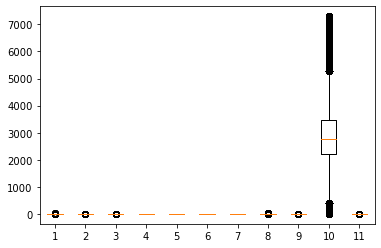

<Figure size 720x720 with 0 Axes>

In [30]:
plt.boxplot(patient_data_final)
fig = plt.figure(figsize =(10, 10))
plt.show()

There only seems to be outliers in the Admission Deposit feature so we will examine that feature more closely.

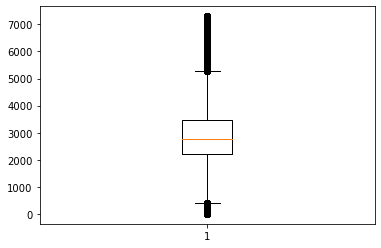

<Figure size 720x720 with 0 Axes>

In [31]:
# Use boxplot to check for outliers in Admission Deposit
plt.boxplot(patient_data_final['Admission_Deposit'])
fig = plt.figure(figsize =(10, 10))
plt.show()

#### Use Interquartile Range (IQR) to Handle Outliers

In [32]:
from scipy import stats
IQR = stats.iqr(patient_data_final.Admission_Deposit, interpolation = 'midpoint')
IQR

1223.0

In [33]:
# Min and Max limit calculation
# First quartile (Q1)
Q1 = patient_data_final.Admission_Deposit.quantile(0.25)
Q1

2229.0

In [34]:
# Third quartile (Q3)
Q3 = patient_data_final.Admission_Deposit.quantile(0.75)
Q3

3452.0

In [35]:
# Getting the minimum limit
min_limit=Q1 - 1.5*IQR
min_limit

394.5

In [36]:
# Getting the maximum limit
max_limit=Q3 +1.5*IQR
max_limit

5286.5

In [37]:
# Filter the data (Min Limit)
patient_data_final.loc[patient_data_final['Admission_Deposit'] < min_limit]

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
525,2,2,3,5,1,0,2,6,5,257,8
951,2,1,2,5,3,1,0,11,5,198,10
1596,3,2,3,2,1,0,0,6,6,188,6
2480,3,2,2,5,1,1,2,6,6,208,1
2481,4,2,2,5,1,1,2,6,6,140,1
...,...,...,...,...,...,...,...,...,...,...,...
315977,6,2,2,3,0,0,0,3,3,208,1
317518,4,2,2,1,0,1,2,4,4,267,3
317963,3,2,2,5,2,2,1,3,2,386,1
318004,2,2,2,5,2,1,0,6,6,370,1


In [38]:
# Imputing the outliers as the count is high
patient_data_final.loc[patient_data_final['Admission_Deposit'] < min_limit,'Admission_Deposit']=np.median(patient_data_final.Admission_Deposit)

In [39]:
# Filter the data (again to check)
# Returns 0 rows as expected
patient_data_final.loc[patient_data_final['Admission_Deposit'] < min_limit]

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


In [40]:
# Filter the data (Max Limit)
patient_data_final.loc[patient_data_final['Admission_Deposit'] > max_limit]

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
3,2,3,2,3,1,1,0,2,5,5315,4
13,3,3,3,5,2,2,0,2,5,6453,2
15,3,2,1,5,2,0,0,2,7,7041,0
18,4,3,3,1,1,1,0,2,7,5485,2
20,2,1,3,0,2,1,0,2,7,6197,3
...,...,...,...,...,...,...,...,...,...,...,...
318291,5,2,1,3,3,2,2,4,4,6631,2
318345,3,1,2,5,3,0,2,6,8,5553,3
318409,2,4,2,0,3,0,2,3,4,6803,2
318425,2,1,3,5,3,0,1,2,1,6078,1


In [41]:
# Imputing the outliers as the count is high
patient_data_final.loc[patient_data_final['Admission_Deposit'] > max_limit,'Admission_Deposit']=np.median(patient_data_final.Admission_Deposit)

In [42]:
# Filter the data (again to check)
# Returns 0 rows as expected
patient_data_final.loc[patient_data_final['Admission_Deposit'] > max_limit]

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


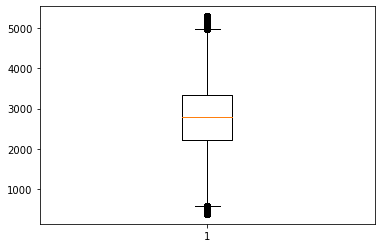

<Figure size 720x720 with 0 Axes>

In [43]:
# Use boxplot to check for outliers in Admission Deposit (again)
plt.boxplot(patient_data_final['Admission_Deposit'])
fig = plt.figure(figsize =(10, 10))
plt.show()

The new boxplot shows that we have signigicantly reduced the outliers for Admissions Deposit.

In [44]:
# Check one last time for NaN values
# Age has 16768 NaN values which we must deal with
patient_data_final.isnull().sum()

Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### Feature Selection 

<AxesSubplot:>

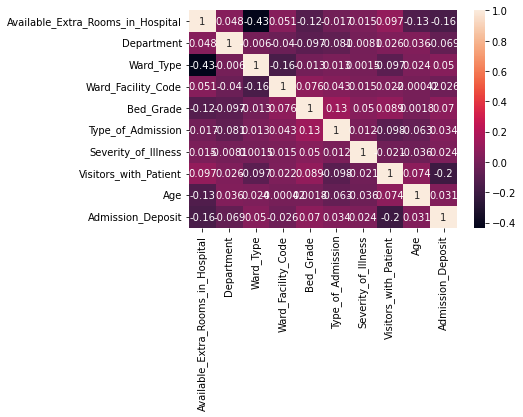

In [45]:
# Check Correlation/Heat Map
sns.heatmap(patient_data_final.drop('Stay',axis=1).corr(),annot=True)

As shown above diagram all values in between 0 & 1 , No correlation found

In [46]:
#Value Counts of Target Variable
patient_data_final.Stay.value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

#### We can now proceed to selecting our supervised learning models to use on the final dataset.

### Model Creation

In [47]:
# Create X
X=patient_data_final.drop(labels=['Stay'], axis=1)
X

,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,3,3,2,5,1,0,0,2,5,2954
1,2,3,3,5,1,1,0,2,5,3997
2,2,1,3,4,1,1,0,2,5,2788
3,2,3,2,3,1,1,0,2,5,2784
4,2,3,3,3,1,1,0,2,5,3601
...,...,...,...,...,...,...,...,...,...,...
318433,3,3,1,5,3,0,2,3,4,2187
318434,2,1,1,4,3,2,2,4,8,4742
318435,3,2,2,5,3,0,1,3,7,2278
318436,3,1,1,3,2,1,1,5,1,1804


In [48]:
# Create y
y=patient_data_final.Stay
y

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int32

#### Model 1 (Linear Regression)

In [49]:
# Create Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [50]:
# Create the Linear Regression Model
from sklearn.linear_model import LinearRegression

# Object Creation
LR=LinearRegression()

# Training of linear Regression Model
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)

In [51]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [52]:
r2score

0.369491903153667

#### Accuracy of Linear Regression : 0.36

In [53]:
X_test.shape

(63688, 10)

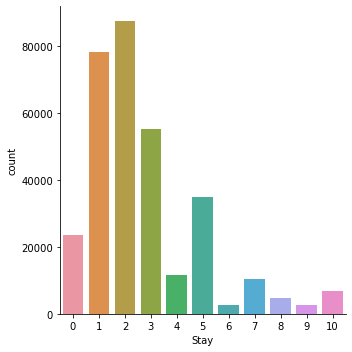

In [54]:
# Checking the balance of target
sns.catplot(x='Stay',data=patient_data,kind='count')

#### Apply SMOTE to Balance our Data

In [55]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({2: 87491, 1: 78139, 3: 55159, 5: 35018, 0: 23604, 4: 11743, 7: 10254, 10: 6683, 8: 4838, 9: 2765, 6: 2744})
Counter({0: 87491, 4: 87491, 3: 87491, 1: 87491, 5: 87491, 2: 87491, 7: 87491, 10: 87491, 8: 87491, 6: 87491, 9: 87491})


In [56]:
# Preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

#### Model 2 (Decision Tree)

In [57]:
# Preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)
y_hat

array([ 5., 10.,  0., ...,  6.,  0.,  6.])

In [59]:
y_train_predict=dt.predict(X_train)
y_train_predict

array([4., 4., 2., ..., 2., 7., 9.])

In [60]:
y_test_predict=dt.predict(X_test)
y_test_predict

array([ 5., 10.,  0., ...,  6.,  0.,  6.])

In [61]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error,mean_squared_error

s= mean_squared_error(y_train,y_train_predict)

print('mean squared error of training set :%2f'%s)

p = mean_squared_error(y_test,y_test_predict)

print('mean squared error of testing set :%2f'%p)


mean squared error of training set :0.044521
mean squared error of testing set :3.875765


In [62]:
# check the score of r2 score
from sklearn.metrics import r2_score

s= r2_score(y_train,y_train_predict)

print('R2 score of training set :%2f'%s)

p = r2_score(y_test,y_test_predict)

print('R2 score of testing set :%2f'%p)

R2 score of training set :0.995547
R2 score of testing set :0.612542


#### Accuracy of Decision Tree : 0.99

#### Model 3 (Random Forest)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_res = RandomForestRegressor()
rf_res.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
y_train_predict=rf_res.predict(X_train)
y_train_predict

array([3.96, 4.01, 2.24, ..., 1.71, 7.  , 8.47])

In [65]:
y_test_predict=rf_res.predict(X_test)
y_test_predict

array([6.13, 9.94, 1.24, ..., 5.96, 0.8 , 3.64])

In [66]:
from sklearn.metrics import mean_squared_error

s= mean_squared_error(y_train,y_train_predict)

print('mean squared error of training set :%2f'%s)

p = mean_squared_error(y_test,y_test_predict)

print('mean squared error of testing set :%2f'%p)

mean squared error of training set :0.350637
mean squared error of testing set :2.277561


In [68]:
from sklearn.metrics import r2_score

s= r2_score(y_train,y_train_predict)

print('R2 score of training set :%2f'%s)

p = r2_score(y_test,y_test_predict)

print('R2 score of testing set :%2f'%p)

R2 score of training set :0.964933
R2 score of testing set :0.772314


#### Accuracy of random forest : 0.96

#### Model 4 (Gradient Boosting Regressor)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(X_train,y_train)
y_gbm=gbm.predict(X_test)

In [72]:
# Evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test,y_gbm)

0.5002591304897374

In [73]:
X_test.shape

(240601, 10)

In [74]:
adj_r2_score=1-(1-0.16)*(218728-1)/(218728-6-1)
adj_r2_score

0.15997695694514935

In [75]:
# Training score
y_pr_tra = gbm.predict(X_train)

In [76]:
r2_score(y_train,y_pr_tra)

0.5026675638027105

In [77]:
X_train.shape

(721800, 10)

In [78]:
# Adjusted r2score
adj_r2_tra=1-(1-0.16)*(656182-1)/(656182-6-1)
adj_r2_tra

0.15999231912218537

#### Accuracy of  Gradient Boosting Regressor: 0.50

In [79]:
from xgboost import XGBRegressor
xgb_r= XGBRegressor()
xgb_r.fit(X_train,y_train)
y_hat=xgb_r.predict(X_test)

In [80]:
r2_score(y_test,y_hat)

0.55861053625829

### Model Comparison Report

We have used all these algorithms and their accuracy :
              
           Acuuracy of Linear Regression :0.36
           Acuuracy of Decision Tree :0.99
           Acuuracy of Random Forest :0.96
           Acuuracy of Gradient Boosting Regressor :0.55
          
           
    "Random Forest and Decision Tree is the best algorithm for our dataset"  


### Conclusion :-



The ability to predict LOS can provide a clinical indicator of the health status of a patient as well as assist in predicting the level of care that is required.LOS varies with respect to many factors including severity of illness, diagnosis and a variety of patient factors. This paper provides a review of LoS prediction methods, their respective shortcomings as well as the types of data and features that have been used in the literature. Despite the continuing efforts to predict and reduce the LOS of patients, The model tuning and data preprocessing steps are too specific and result in a large proportion of the current prediction mechanisms being restricted to the hospital that they were employed in.

Machine learning implementations and their explanations, if not sufficiently interpretable, could further hamper the day-to-day effort, of a healthcare worker. Balancing the interpretability of such models with the overall prediction performance that they provide will be a key challenge in the future of LOS prediction.
